In [1]:
import pandas as pd
import datetime as dt

today = dt.datetime.today().strftime("%m/%d/%Y %H:%M:%S")
NYC = pd.read_json('https://data.cityofnewyork.us/resource/swhp-yxa4.json')
#NYC.info()
# minimum_qual_requirements has nulls
# post_until has nulls too (a majority actually)
NYC['minimum_qual_requirements'].fillna('Not Applicable', inplace=True)
NYC['post_until'].fillna(today, inplace=True)
NYC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
__of_positions                   1000 non-null int64
additional_information           669 non-null object
agency                           1000 non-null object
business_title                   1000 non-null object
civil_service_title              1000 non-null object
division_work_unit               1000 non-null object
full_time_part_time_indicator    926 non-null object
hours_shift                      266 non-null object
job_category                     1000 non-null object
job_description                  1000 non-null object
job_id                           1000 non-null int64
level                            1000 non-null object
minimum_qual_requirements        1000 non-null object
post_until                       1000 non-null object
posting_date                     1000 non-null object
posting_type                     1000 non-null object
posting_updated                  10

In [2]:
# Get a Dataframe showing the Agency with the Most # of Positions
numOfJobs = pd.DataFrame(NYC, columns=['agency', '__of_positions'])
numOfJobs = numOfJobs.groupby('agency').count()
numOfJobs = numOfJobs.sort_values(by='__of_positions', ascending=False)
numOfJobs = numOfJobs.head(10)
numOfJobs

,__of_positions
agency,
DEPT OF ENVIRONMENT PROTECTION,211
DEPT OF HEALTH/MENTAL HYGIENE,208
DEPARTMENT OF TRANSPORTATION,63
DEPT OF DESIGN & CONSTRUCTION,58
DEPT OF INFO TECH & TELECOMM,40
NYC HOUSING AUTHORITY,36
ADMIN FOR CHILDREN'S SVCS,31
DEPARTMENT OF BUSINESS SERV.,31
OFFICE OF THE COMPTROLLER,29


In [3]:
# Get a Dataframe showing the Agency with the lowest pay available.
lowestPay = pd.DataFrame(NYC, columns=['agency', 'salary_range_from', 'salary_frequency'])
lowestPay['Consolidated Salaries'] = lowestPay['salary_range_from'].copy()
lowestPay['Consolidated Salaries'][ lowestPay['salary_frequency'] == 'Daily'] = \
lowestPay['Consolidated Salaries']*(52*5)
lowestPay['Consolidated Salaries'][ lowestPay['salary_frequency'] == 'Hourly'] = \
lowestPay['Consolidated Salaries']*(1820)
dfL = lowestPay[['agency', 'Consolidated Salaries']]
dfL = dfL.groupby(['agency']).min()
dfL = dfL.sort_values(by='Consolidated Salaries', ascending=True)
##lowestPay = lowestPay.groupby(['agency']).min()
##lowestPay = lowestPay.sort_values(by='Consolidated Salaries', ascending=True)
##lowestPay = lowestPay[['agency', 'Consolidated Salaries']]
dfL

/home/chin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/chin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,Consolidated Salaries
agency,
DEPT OF HEALTH/MENTAL HYGIENE,0.000
FINANCIAL INFO SVCS AGENCY,0.000
OFFICE OF COLLECTIVE BARGAININ,15925.000
DEPARTMENT OF BUSINESS SERV.,24570.000
DEPARTMENT OF SANITATION,24570.000
TAXI & LIMOUSINE COMMISSION,24570.000
NYC DEPT OF VETERANS' SERVICES,24570.000
DEPT OF DESIGN & CONSTRUCTION,24570.000
OFFICE OF THE COMPTROLLER,25480.000


In [4]:
# Get the highest pay
highestPay = pd.DataFrame(NYC, columns=['agency', 'salary_range_to', 'salary_frequency'])
highestPay['Consolidated Salaries'] = highestPay['salary_range_to'].copy()
highestPay['Consolidated Salaries'][ highestPay['salary_frequency'] == 'Daily'] = \
highestPay['Consolidated Salaries']*(52*5)
highestPay['Consolidated Salaries'][ highestPay['salary_frequency'] == 'Hourly'] = \
highestPay['Consolidated Salaries']*(1820)
dfH = highestPay[['agency', 'Consolidated Salaries']]
dfH = dfH.groupby(['agency']).max()
dfH = dfH.sort_values(by='Consolidated Salaries', ascending=False)
##highestPay = highestPay.groupby(['agency']).max()
##highestPay = highestPay.sort_values(by='Consolidated Salaries', ascending=False)
##highestPay
dfH

/home/chin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/chin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,Consolidated Salaries
agency,
FINANCIAL INFO SVCS AGENCY,226366.00
NYC EMPLOYEES RETIREMENT SYS,224749.00
DEPT OF HEALTH/MENTAL HYGIENE,217244.00
NYC HOUSING AUTHORITY,208298.00
DEPARTMENT FOR THE AGING,202744.00
DEPT OF DESIGN & CONSTRUCTION,202744.00
DEPT OF ENVIRONMENT PROTECTION,198518.00
DEPARTMENT OF SANITATION,194395.00
TAXI & LIMOUSINE COMMISSION,185000.00


In [5]:
#numOfJobs.plot.barh(title='# of Jobs per NYC Agency', figsize=(10,10));
#a = plt.show()
#a
import matplotlib.pyplot as plt
import numpy as np

plt.rcdefaults()
fig, ax = plt.subplots()

x_axis = tuple(numOfJobs.__of_positions)
y_axis = tuple(numOfJobs.index)

ax.bar(left = y_axis, height = x_axis, width = 0.8, bottom=None, align='center', color='green')
plt.show()

TypeError: bar() missing 1 required positional argument: 'x'

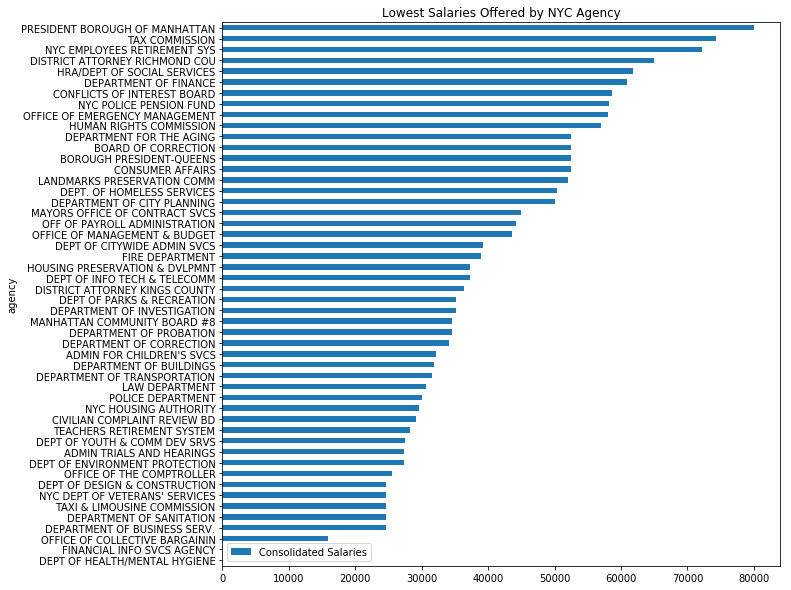

In [6]:
dfL.plot.barh(title='Lowest Salaries Offered by NYC Agency', figsize=(10,10));
l = plt.show()
l

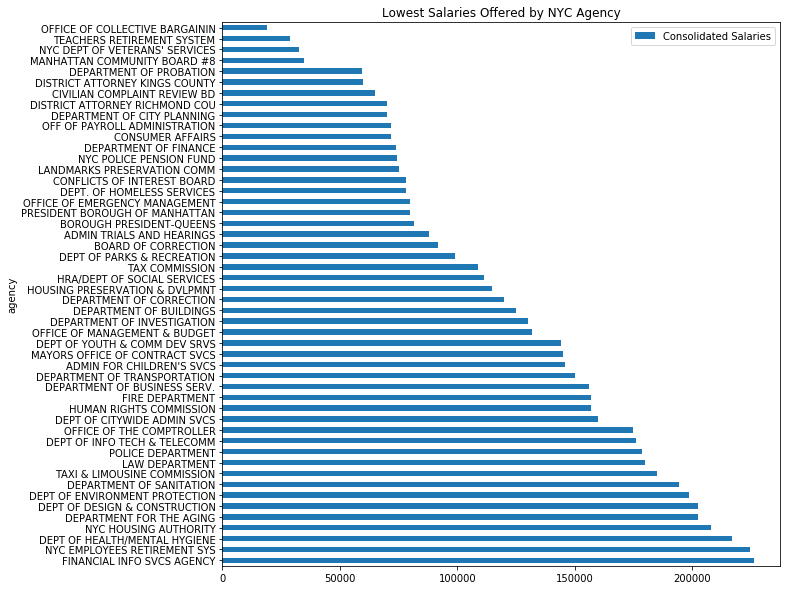

In [7]:
dfH.plot.barh(title='Lowest Salaries Offered by NYC Agency', figsize=(10,10));
h = plt.show()
h